In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['Labels','Text'])
df.head()

,Labels,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

Labels    0
Text      0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Labels']=le.fit_transform(df['Labels'])
df.head()

,Labels,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(max_features=3000)
x_inp=tfid.fit_transform(df['Text']).toarray()
x_inp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
x_inp.shape

(5572, 3000)

In [18]:
df.shape

(5572, 2)

In [19]:
y=df['Labels']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_inp,y,test_size=0.25,random_state=0)

In [23]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

0.886575735821967


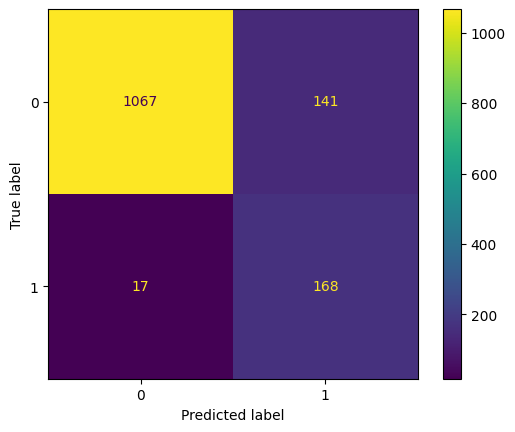

In [24]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [25]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [27]:
stwords=stopwords.words('english')
stwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
ps=PorterStemmer()

In [34]:
def clean_text(sent):
    lst=word_tokenize(sent)
    lst=[ps.stem(word) for word in lst if word not in stwords]
    lst=[word for word in lst if word.isalpha() or word.isdigit()]
    return lst
    

In [37]:
clean_text("Hello guyss going to doing ?")

['hello', 'guyss', 'go']